## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)
print("Libraries imported successfully.")

Libraries imported successfully.


## Load and Explore the Dataset

In [26]:
data_Set_path = "../data/diabetes_prediction_dataset.csv"  # 🔸 Replace with your actual file path
df = pd.read_csv(data_Set_path)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [27]:
# Basic data info
print("\n--- Data Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicate Rows ---")
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--- Missing Values ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes            

## Encode Categorical Variables

In [28]:
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

print("\n✅ Categorical variables encoded successfully!")
print(df.head())

gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

✅ Categorical variables encoded successfully!
   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0  80.0             0              1  25.19          6.6   
1       0  54.0             0              0  27.32          6.6   
2       1  28.0             0              0  27.32          5.7   
3       0  36.0             0              0  23.45          5.0   
4       1  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_history_current  \
0                  140         0                    False   
1                   80         0                    False   
2                  158         0                    False   
3                  155         0                     True   
4                  155         0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_n

## Split Data (70% Train, 20% Test, 10% Validation)

In [29]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# 70% train, 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split 30% into 20% test, 10% validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=(1/3), random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}, Validation: {X_val.shape}")

Train: (67302, 12), Test: (19229, 12), Validation: (9615, 12)


## Scale Features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_val_scaled   = scaler.transform(X_val)

## Train Logistic Regression Model

In [31]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Evaluate the Model

In [32]:
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred  = log_model.predict(X_test_scaled)
y_val_pred   = log_model.predict(X_val_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n--- Accuracy Scores ---")
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Testing Accuracy:    {test_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

print("\n--- Classification Report (Validation) ---")
print(classification_report(y_val, y_val_pred))


--- Accuracy Scores ---
Training Accuracy:   0.9590
Testing Accuracy:    0.9571
Validation Accuracy: 0.9615

--- Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8767
           1       0.88      0.66      0.75       848

    accuracy                           0.96      9615
   macro avg       0.92      0.82      0.86      9615
weighted avg       0.96      0.96      0.96      9615



## ROC-AUC and Confusion Matrix

ROC-AUC (Validation): 0.9628


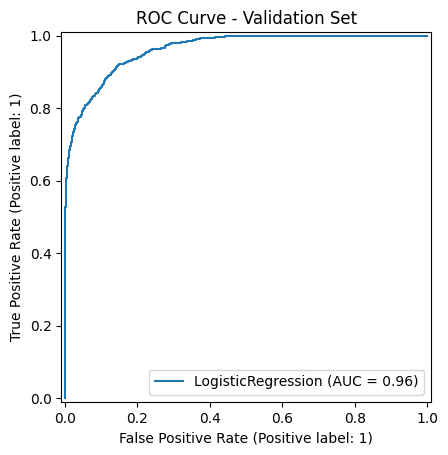

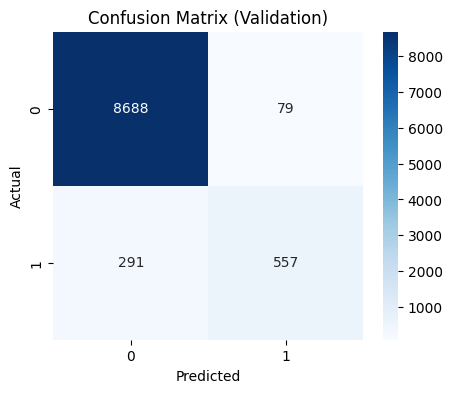

In [33]:
y_val_proba = log_model.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC-AUC (Validation): {roc_auc:.4f}")

RocCurveDisplay.from_estimator(log_model, X_val_scaled, y_val)
plt.title("ROC Curve - Validation Set")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()

C:\Users\shifttech\AppData\Local\Temp\ipykernel_10548\3165894011.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Coefficient', y='Feature', palette='coolwarm')


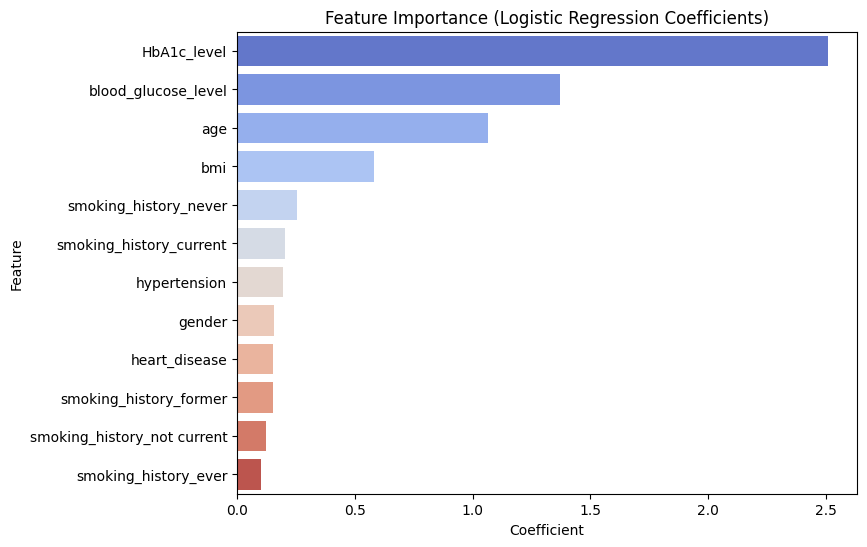

In [34]:
# 9️⃣ Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [35]:
# ✅ Summary
print("\n✅ Logistic Regression model training complete!")
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Testing Accuracy:    {test_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation ROC-AUC:  {roc_auc:.4f}")


✅ Logistic Regression model training complete!
Training Accuracy:   0.9590
Testing Accuracy:    0.9571
Validation Accuracy: 0.9615
Validation ROC-AUC:  0.9628


## Test with Sample Data
Let's test the model with a new sample patient to predict if they are diabetic or non-diabetic.

In [ ]:
sample_1 = pd.DataFrame({
    'gender': [0],  # After encoding (0 or 1)
    'age': [65.0],
    'hypertension': [1],
    'heart_disease': [1],
    'bmi': [35.5],
    'HbA1c_level': [7.5],
    'blood_glucose_level': [200]
})

# Add smoking_history encoded columns
smoking_cols = [col for col in X.columns if col.startswith('smoking_history_')]
for col in smoking_cols:
    if col == 'smoking_history_current' or col == 'smoking_history_former':
        sample_1[col] = [1] if col == 'smoking_history_current' else [0]
    else:
        sample_1[col] = [0]

sample_1 = sample_1[X.columns]

sample_2 = pd.DataFrame({
    'gender': [1],
    'age': [28.0],
    'hypertension': [0],
    'heart_disease': [0],
    'bmi': [22.5],
    'HbA1c_level': [5.0],
    'blood_glucose_level': [95]
})

for col in smoking_cols:
    sample_2[col] = [0]  # Never smoked

# Reorder columns to match X
sample_2 = sample_2[X.columns]

# Scale the sample data using the same scaler
sample_1_scaled = scaler.transform(sample_1)
sample_2_scaled = scaler.transform(sample_2)

# Make predictions
prediction_1 = log_model.predict(sample_1_scaled)[0]
prediction_2 = log_model.predict(sample_2_scaled)[0]

# Get prediction probabilities
proba_1 = log_model.predict_proba(sample_1_scaled)[0]
proba_2 = log_model.predict_proba(sample_2_scaled)[0]

# Display results
print("SAMPLE PATIENT 1:")
print(f"Prediction: {'DIABETIC' if prediction_1 == 1 else 'NON-DIABETIC'}")
print(f"Confidence: {max(proba_1[0], proba_1[1]):.2%}\n")

print("SAMPLE PATIENT 2:")
print(f"Prediction: {'DIABETIC' if prediction_2 == 1 else 'NON-DIABETIC'}")
print(f"Confidence: {max(proba_2[0], proba_2[1]):.2%}")

SAMPLE PATIENT 1:
Prediction: DIABETIC
Confidence: 99.21%

SAMPLE PATIENT 2:
Prediction: NON-DIABETIC
Confidence: 99.99%
